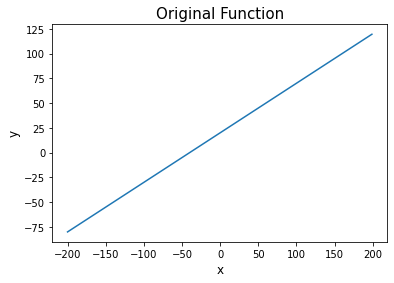

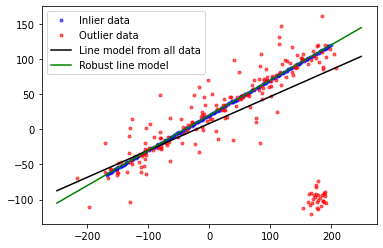

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import LineModelND, ransac

rng = np.random.default_rng()

# generate coordinates of line
x = np.arange(-200, 200)
y = 0.5* x + 20
data = np.column_stack([x, y])

#plot
plt.title('Original Function', fontsize=15)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.plot(x,y)
plt.show()

# add gaussian noise to coordinates
noise = rng.normal(size=data.shape)
data += 0.5 * noise
data[::2] += 5 * noise[::2]
data[::4] += 20 * noise[::4]

# add faulty data
faulty = np.array(30 * [(180., -100)])
faulty += 10 * rng.normal(size=faulty.shape)
data[:faulty.shape[0]] = faulty

# fit line using all data
model = LineModelND()
model.estimate(data)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(data, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6,
        label='Inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.r', alpha=0.6,
        label='Outlier data')
ax.plot(line_x, line_y, '-k', label='Line model from all data')
ax.plot(line_x, line_y_robust, '-g',label='Robust line model')
ax.legend()
plt.show()